In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rawpy
# import rawpy.enhance
# import imageio
import imutils
import cv2

In [30]:
path = '/Users/jorgemarpa/Pictures/Lightroom/2022/2022-06-28/DSC01095.ARW'
raw = rawpy.imread(path)
bayer = raw.raw_image_visible
rgb = raw.postprocess()

In [31]:
bayer.shape, rgb.shape

((3132, 4736), (3132, 4736, 3))

In [39]:
raw.raw_pattern

array([[0, 1],
       [1, 2]], dtype=uint8)

In [73]:
raw.raw_colors

array([[0, 1, 0, ..., 1, 0, 1],
       [1, 2, 1, ..., 2, 1, 2],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 2, 1, ..., 2, 1, 2],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 2, 1, ..., 2, 1, 2]], dtype=uint8)

In [76]:
raw.color_desc

b'RGBG'

In [77]:
raw.camera_whitebalance

[2648.0, 1024.0, 1594.0, 1024.0]

In [55]:
raw.white_level

16380

In [79]:
raw.raw_color(0,1)

1

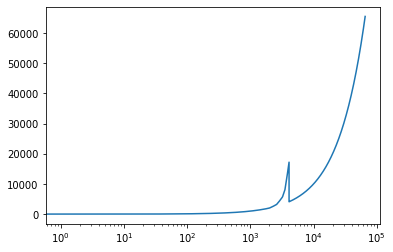

In [54]:
plt.plot(raw.tone_curve);
plt.xscale("log")

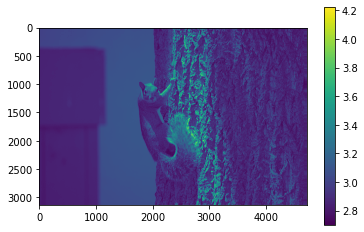

In [80]:
im = plt.imshow(np.log10(bayer))
plt.colorbar(im)
plt.show()

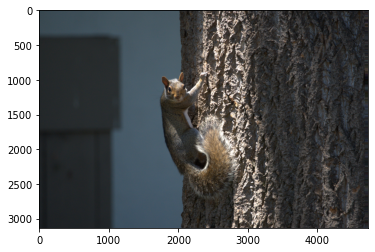

In [92]:
rgb_awb = raw.postprocess(use_camera_wb=False, use_auto_wb=True)
im = plt.imshow(rgb_awb)
plt.show()

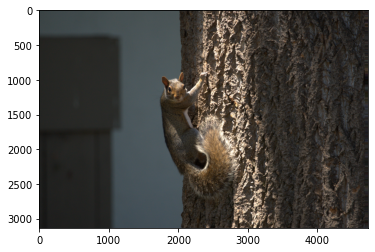

In [93]:
rgb_cwb = raw.postprocess(use_camera_wb=True, use_auto_wb=False)
im = plt.imshow(rgb_cwb)
plt.show()

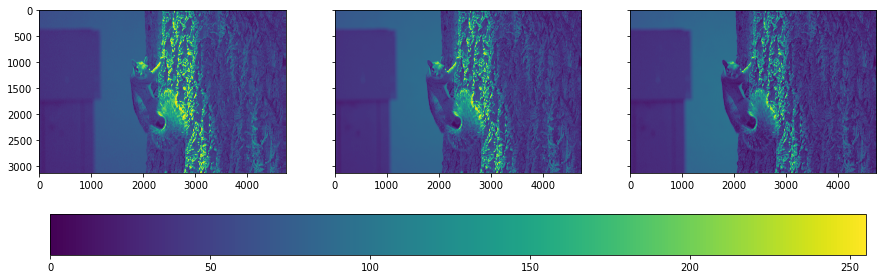

In [27]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
im = ax[0].imshow(rgb_cwb[:, :, 0])
im = ax[1].imshow(rgb_cwb[:, :, 1])
im = ax[2].imshow(rgb_cwb[:, :, 2])
plt.colorbar(im, ax=ax, location="bottom")
plt.show()

In [86]:
bad_pixels = rawpy.enhance.find_bad_pixels([path])

/Users/jorgemarpa/.pyenv/versions/image_raw/lib/python3.8/site-packages/rawpy/enhance.py:178: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  med = median_(rawslice)
/Users/jorgemarpa/.pyenv/versions/image_raw/lib/python3.8/site-packages/skimage/filters/rank/generic.py:262: UserWarning: Bad rank filter performance is expected due to a large number of bins (10645), equivalent to an approximate bitdepth of 13.4.
  image, footprint, out, mask, n_bins = _preprocess_input(image, footprint,
/Users/jorgemarpa/.pyenv/versions/image_raw/lib/python3.8/site-packages/skimage/filters/rank/generic.py:262: UserWarning: Bad rank filter performance is expected due to a large number of bins (16629), equivalent to an approximate bitdepth of 14.0.
  image, footprint, out, mask, n_bins = _preprocess_input(image, footprint,
/Users/jorgemarpa/.pyenv/versions/image_raw/lib/python3.8/site-packages/skimage/filters/rank/gener

In [88]:
bad_pixels.shape

(6475508, 2)

In [90]:
bad_pixels_img = np.zeros(bayer.shape, bool)
bad_pixels_img[bad_pixels[:,0],bad_pixels[:,1]] = True


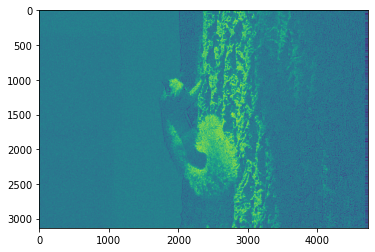

In [91]:
plt.imshow(bad_pixels_img);